In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import permutations, combinations
import random, csv

In [2]:
actors = [
    {"id": "nm0425005", "name": "Dwayne Johnson"},
    {"id": "nm1165110", "name": "Chris Hemsworth"},
    {"id": "nm0000375", "name": "Robert Downey Jr."},
    {"id": "nm0474774", "name": "Akshay Kumar"},
    {"id": "nm0000329", "name": "Jackie Chan"},
    {"id": "nm0177896", "name": "Bradley Cooper"},
    {"id": "nm0001191", "name": "Adam Sandler"},
    {"id": "nm0424060", "name": "Scarlett Johansson"},
    {"id": "nm0005527", "name": "Sofia Vergara"},
    {"id": "nm0262635", "name": "Chris Evans"}
]

In [3]:
actor_nodes = list(enumerate(actors))

In [4]:
distances = []

with open('./data/movie_distances.csv', encoding="utf8") as f:
    csv_reader = csv.DictReader(f)
    # skip the header
    next(csv_reader)
    # show the data
    for line in csv_reader:
        distances.append(line)

In [5]:
weighted_edge_list = []

weights_colors = {
     1: "green",
     2: "red",
     3: "blue",
     4: "black",
     5: "brown",
     6: None
    }

for data in distances:
    l_node = [x[0] for x in actor_nodes if x[1]["id"] == data["actor_from"]][0]
    r_node = [x[0] for x in actor_nodes if x[1]["id"] == data["actor_to"]][0]
    w = data["distance"]
    weighted_edge_list.append((l_node,r_node, int(w) * .01))

In [6]:
G = nx.Graph()
G.add_nodes_from(actor_nodes)
G.add_weighted_edges_from(weighted_edge_list)

In [7]:
G.add_nodes_from(actor_nodes)
names=nx.get_node_attributes(G,'name')

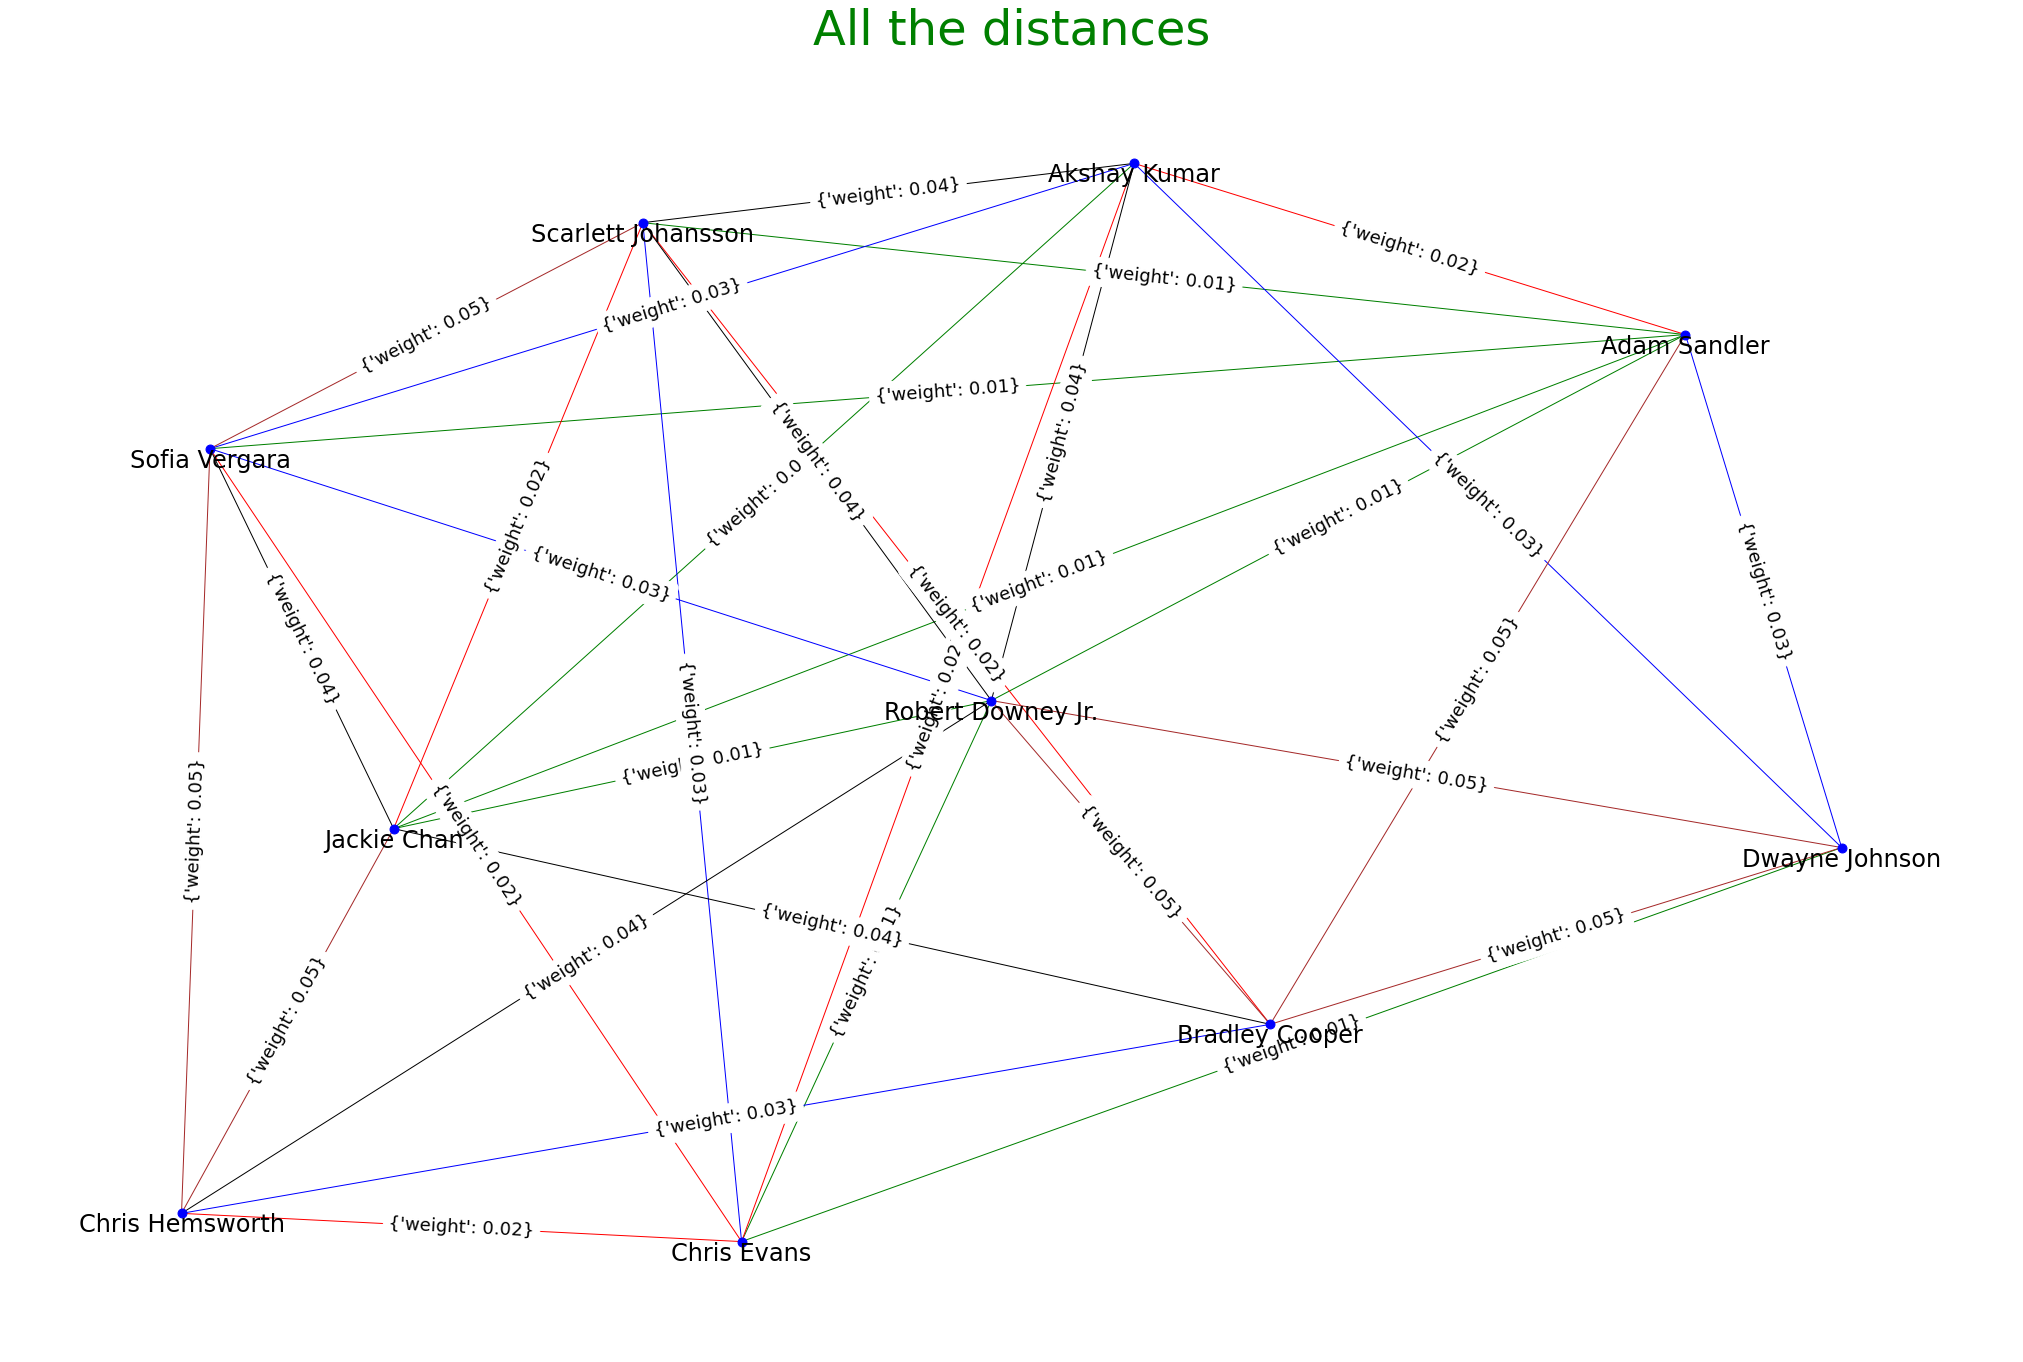

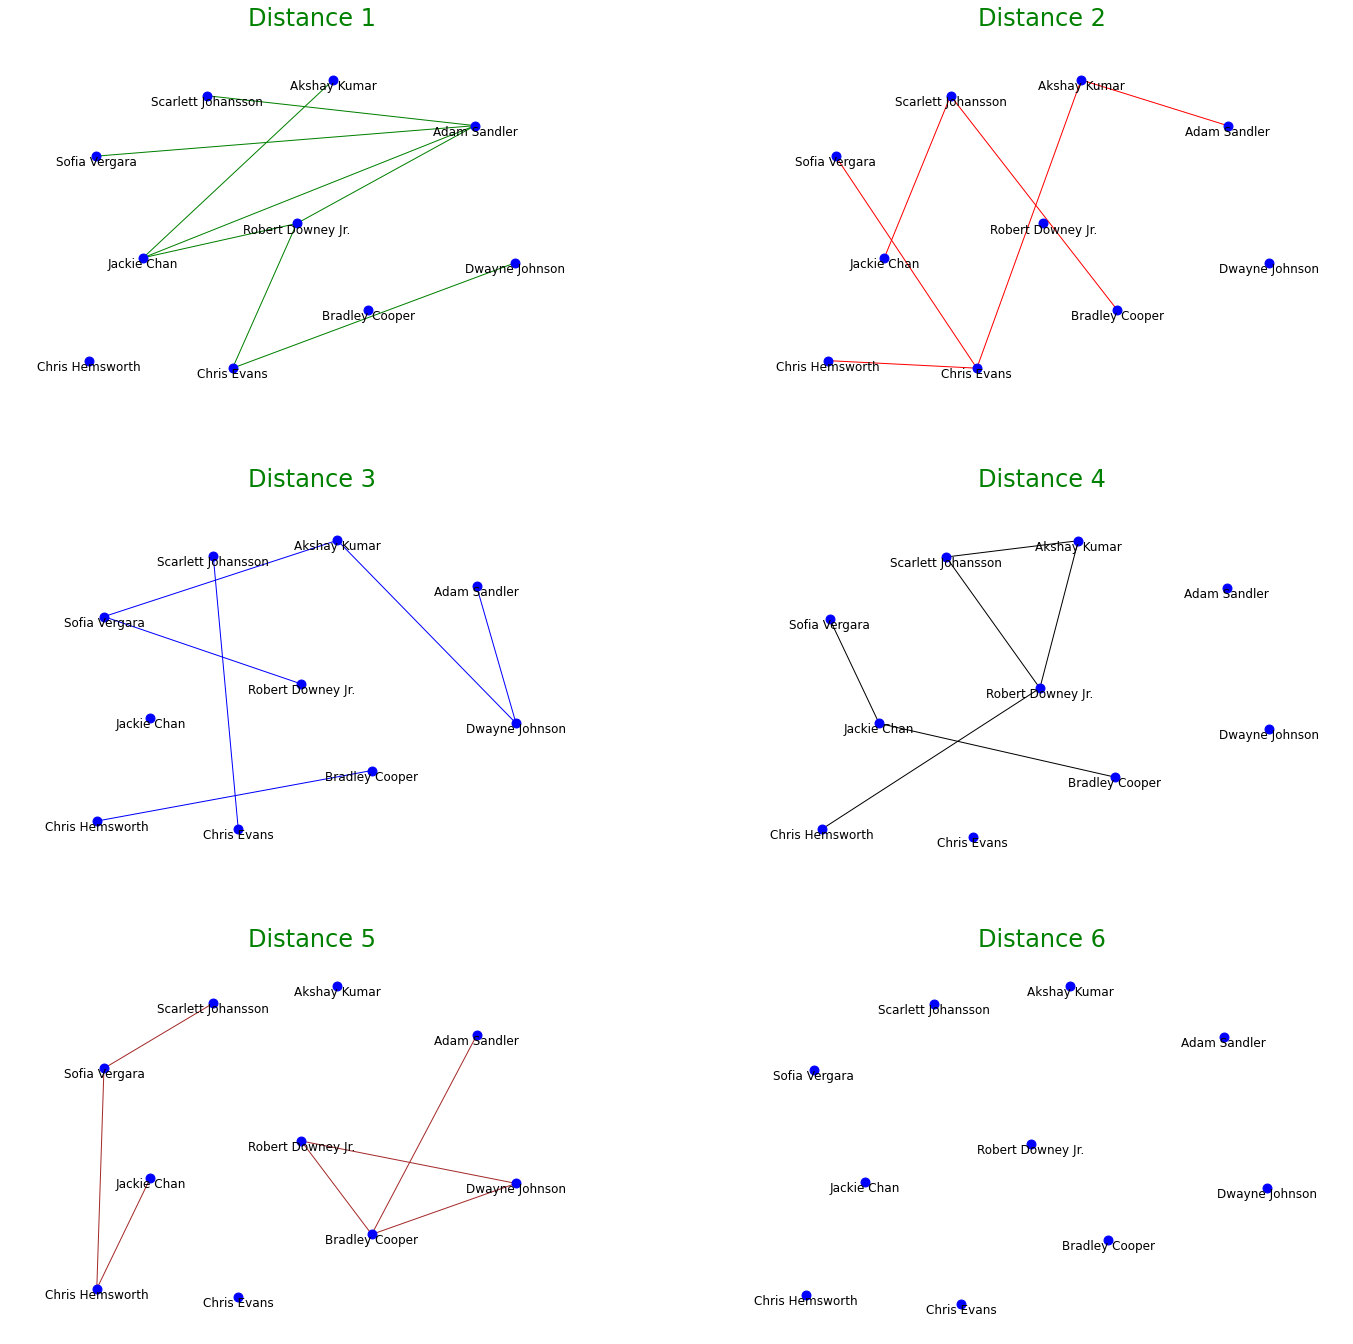

In [12]:
pos = nx.spring_layout(G, seed=17)

lbs = nx.get_node_attributes(G,'name')


fig = plt.figure(num='distances', figsize=(36,24), dpi=None, facecolor=None, edgecolor=None, frameon=False)


nx.draw_networkx_nodes(G, pos, node_color='b', node_size=80)
nx.draw_networkx_labels(G, pos, lbs, font_size=24, horizontalalignment='center', verticalalignment='top')

for w in range(1,6):
    edge_list = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == w * .01]
    edge_labels = {(u, v): d for (u, v, d) in G.edges(data=True) if d["weight"] == w * .01}
    edge_color = weights_colors[w]

    nx.draw_networkx_edges(G, pos, edgelist=edge_list, width=1, edge_color=edge_color)
    nx.draw_networkx_edge_labels(G, pos, font_size=18, edge_labels=edge_labels)

plt.title("All the distances", fontdict={'fontsize': 48, 'fontweight': 10, 'color': 'g'})
plt.axis('off')
plt.show();

fig, ax = plt.subplots(3,2,figsize=(24,24))

w = 1
for r, c, w in map(lambda x: (x[0][0], x[0][1], x[1]), zip([(r, c) for r in range(3) for c in range(2)], range(1,7))):     
    nx.draw_networkx_nodes(G, pos, node_color='b', node_size=80, ax=ax[r][c])
    nx.draw_networkx_labels(G, pos, lbs, font_size=12, horizontalalignment='center', verticalalignment='top', ax=ax[r][c])
    if w < 6:
        edge_list = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] == w * .01]
        edge_color = weights_colors[w]
        nx.draw_networkx_edges(G, pos, edgelist=edge_list, width=1, edge_color=edge_color, ax=ax[r][c])
        
    ax[r][c].set_ylim(tuple(i * 1.1 for i in ax[r][c].get_ylim()))
    ax[r][c].set_xlim(tuple(i * 1.2 for i in ax[r][c].get_xlim()))
    ax[r][c].set_title('Distance ' + str(w), fontdict={'fontsize': 24, 'fontweight': 10, 'color': 'g'})
    ax[r][c].axis('off')
    w += 1


plt.show();